In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import type_of_target

In [2]:
norms = pd.read_csv('../../data/psychNorms/psychNorms.zip', index_col=0, compression='zip', low_memory=False)
meta = pd.read_csv('../../data/psychNorms/psychNorms_metadata.csv', index_col='norm')
norms

,frequency_lund,frequency_kucera,frequency_subtlexus,frequency_subtlexuk,frequency_blog_gimenes,frequency_twitter_gimenes,frequency_news_gimenes,frequency_written_cobuild,frequency_spoken_cobuild,context_diversity_subtlexus,...,person_vanarsdall,goals_vanarsdall,movement_vanarsdall,concreteness_vanarsdall,familiarity_vanarsdall,imageability_vanarsdall,familiarity_fear,aoa_fear,imageability_fear,sensory_experience_juhasz2013
word,,,,,,,,,,,,,,,,,,,,,
'em,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3617,1.9138,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'neath,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
're,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9031,1.6335,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'shun,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'tis,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.4771,0.6021,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
shrick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.62,4.38,2.93,NaN
post office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.79,3.07,5.29,NaN
fishing rod,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.29,3.38,5.64,NaN


In [3]:
# Adding 'associated_embed' to metadata to avoid data leakage
meta['associated_embed'] = ''
meta.loc[meta.index.str.contains('_lancaster'), 'associated_embed'] = 'norms_sensorimotor'
meta.loc[meta.index == 'association_frequency_dedeyne', 'associated_embed'] = 'PPMI_SVD_SWOW SGSoftMaxInput_SWOW SGSoftMaxOutput_SWOW'

# Adding 'type' to metadata (numeric, binary, multiclass)
meta['type'] = [type_of_target(norms[name].dropna()) for name in meta.index]
meta['type'] = meta['type'].replace('continuous', 'numeric')

# Manually fixing mistyped norms
numeric_norms = [
    'n_senses_wordnet_miller', 'n_senses_wordsmyth_rice', 'n_meanings_websters_gao', 'n_features_buchanan',
    'n_semantic_neighbors_shaoul', 'association_frequency_dedeyne', 'cue_setsize_nelson', 'difficulty_rudell',
    'likableness_anderson', 'meaningfulness_anderson', 'n_meanings_wordsmyth_rice'
]
for norm in meta.index:
    if 'vanarsdall' in norm:
        numeric_norms.append(norm)
        
meta.loc[numeric_norms, 'type'] = 'numeric'

# Identifying count-based norms to investigate which need log transformation
numeric_norms = meta.query('type == "numeric"').index
count_norms = [norm for norm in numeric_norms if norms[norm].dropna().apply(float.is_integer).all()]
meta.loc[count_norms]

,description,citation,category,source,associated_embed,type
norm,,,,,,
n_senses_wordnet_miller,Number of senses based on the WordNet database.,"Miller, G. A. (1995). ""WordNet: a lexical data...",semantic_diversity,SCOPE,,numeric
n_senses_wordsmyth_rice,Number of senses based on the Wordsmyth dictio...,"Rice, C. A., et al. (2019). ""A comparison of h...",semantic_diversity,SCOPE,,numeric
n_meanings_wordsmyth_rice,Number of meanings based on the Wordsmyth dict...,"Rice, C. A., et al. (2019). ""A comparison of h...",semantic_diversity,SCOPE,,numeric
n_meanings_websters_gao,Number of meanings based on the Websters dicti...,"Gao, C., Shinkareva, S. V., & Desai, R. H. (20...",semantic_diversity,SCOPE,,numeric
n_features_buchanan,Number of features listed for the word. This m...,"Buchanan, E. M., et al. (2019). ""English seman...",number_of_features,SCOPE & lit_search,,numeric
n_semantic_neighbors_shaoul,The number of semantic neighbors within a thre...,"Shaoul, C. and C. Westbury (2006). ""Word frequ...",semantic_neighborhood,SCOPE,,numeric
association_frequency_dedeyne,The number of times that a word is one of the ...,"De Deyne, S., et al. (2019). ""The “Small World...",semantic_neighborhood,SCOPE & lit_search,PPMI_SVD_SWOW SGSoftMaxInput_SWOW SGSoftMaxOut...,numeric
cue_setsize_nelson,The number of different responses or targets g...,"Nelson, D. L., et al. (2004). ""The University ...",semantic_neighborhood,SCOPE & lit_search,,numeric
likableness_anderson,Likableness ratings on a scale from 0 (least f...,"Anderson, N. H. (1968). Likableness ratings of...",social/moral,lit_search,,numeric


In [4]:
meta.query('type != "numeric"')

,description,citation,category,source,associated_embed,type
norm,,,,,,
pos_brysbaert,The dominant grammatical category to which a w...,"Brysbaert, M., et al. (2012). ""Adding part-of-...",part_of_speech,SCOPE,,multiclass
pos_vanheuven,The dominant grammatical category to which a w...,"Van Heuven, W. J., et al. (2014). ""SUBTLEX-UK:...",part_of_speech,SCOPE,,multiclass
feature_visual_vinson,Feature weight that describes information asso...,"Vinson, D. P. and G. Vigliocco (2008). ""Semant...",sensory,SCOPE & lit_search,,binary
feature_perceptual_vinson,Feature weight that describes information gain...,"Vinson, D. P. and G. Vigliocco (2008). ""Semant...",sensory,SCOPE & lit_search,,binary
feature_functional_vinson,Feature weight that refers to the purpose of a...,"Vinson, D. P. and G. Vigliocco (2008). ""Semant...",motor,SCOPE & lit_search,,binary
feature_motoric_vinson,Feature weight that describes a motor componen...,"Vinson, D. P. and G. Vigliocco (2008). ""Semant...",motor,SCOPE & lit_search,,binary
anger_mohammad,Word-emotion association built by manual annot...,"Mohammad, S. and P. Turney (2010). Emotions ev...",emotion,SCOPE,,binary
anticipation_mohammad,Word-emotion association built by manual annot...,"Mohammad, S. and P. Turney (2010). Emotions ev...",emotion,SCOPE,,binary
disgust_mohammad,Word-emotion association built by manual annot...,"Mohammad, S. and P. Turney (2010). Emotions ev...",emotion,SCOPE,,binary


<Axes: >

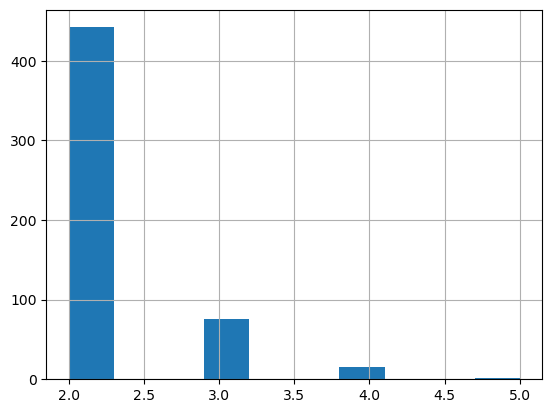

In [5]:
norms['n_meanings_wordsmyth_rice'].hist()

In [6]:
# Keeping only norms that were manually confirmed as count-based
count_norms = [
    'n_senses_wordnet_miller', 'n_senses_wordsmyth_rice', 'n_meanings_websters_gao', 
    'n_features_buchanan', 'n_semantic_neighbors_shaoul', 'association_frequency_dedeyne',
    'cue_setsize_nelson'
]


rt_norms = [norm for norm in numeric_norms if '_rt_' in norm]
rt_norms

['visual_lexical_rt_balota',
 'visual_lexical_rt_mandera',
 'visual_lexical_rt_keuleers',
 'auditory_lexical_rt_tucker',
 'auditory_lexical_rt_goh',
 'naming_rt_balota',
 'concreteness_rt_pexman',
 'aoa_rt_khanna',
 'association_rt_ley',
 'imageability_rt_chiarello',
 'known_rt_chen',
 'aoa_rt_cortese',
 'imageability_rt_cortese',
 'aoa_rt_schock']

n_senses_wordnet_miller


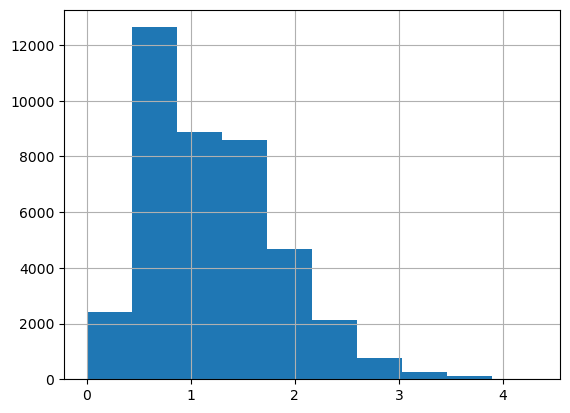

n_senses_wordsmyth_rice


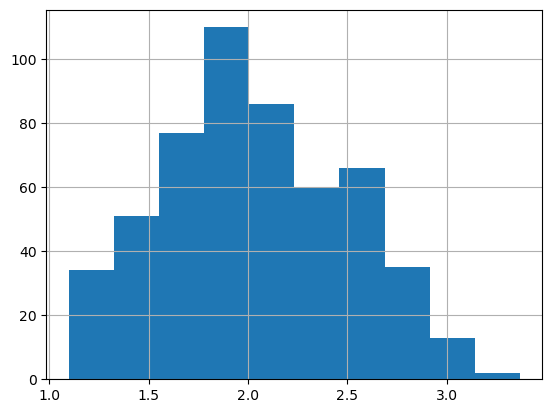

n_meanings_websters_gao


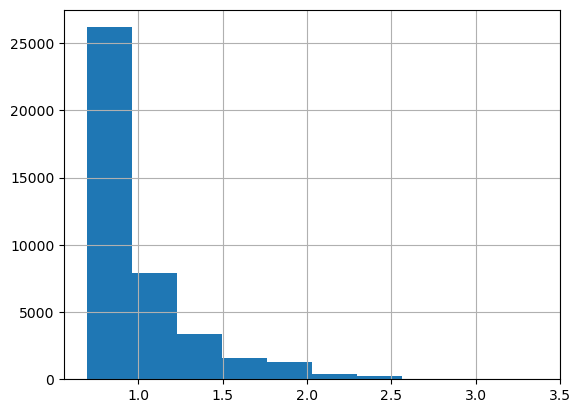

n_features_buchanan


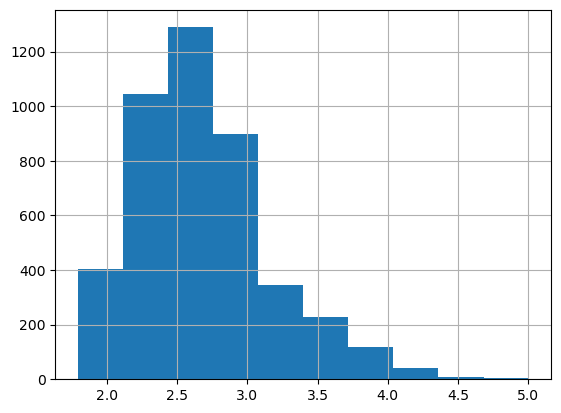

n_semantic_neighbors_shaoul


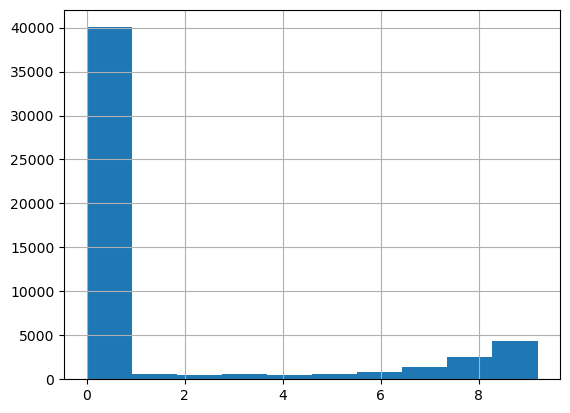

association_frequency_dedeyne


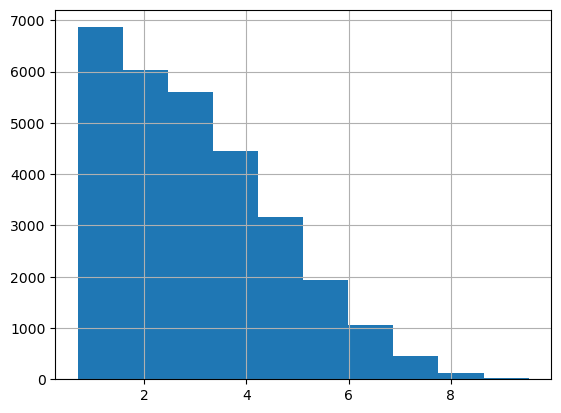

cue_setsize_nelson


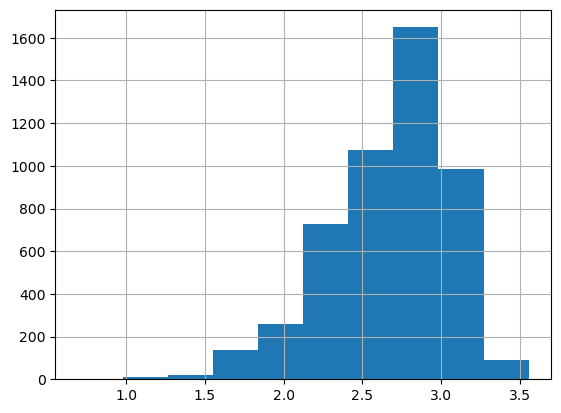

visual_lexical_rt_balota


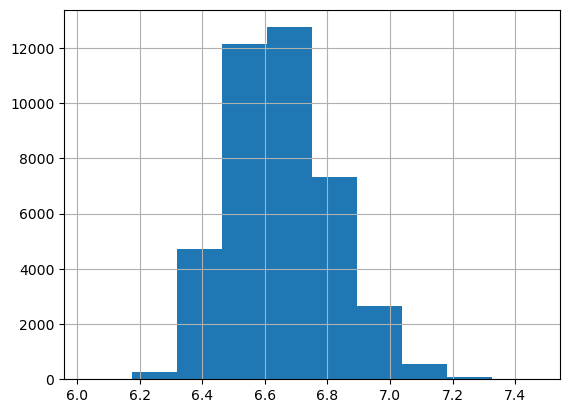

visual_lexical_rt_mandera


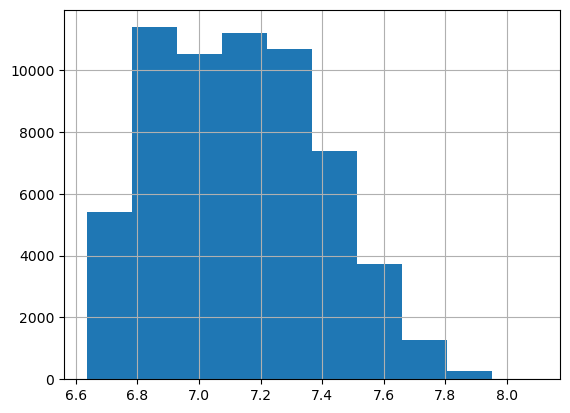

visual_lexical_rt_keuleers


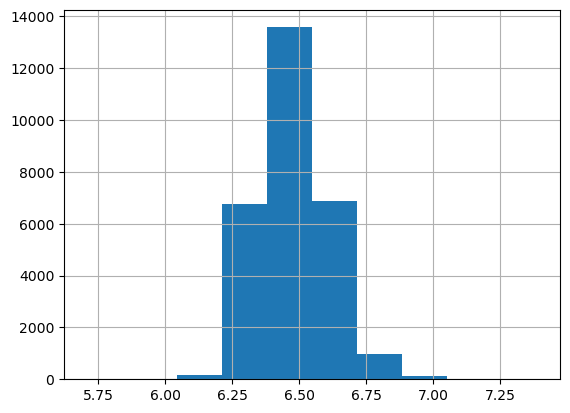

auditory_lexical_rt_tucker


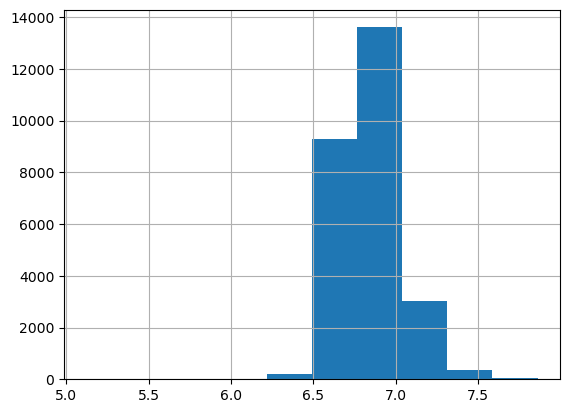

auditory_lexical_rt_goh


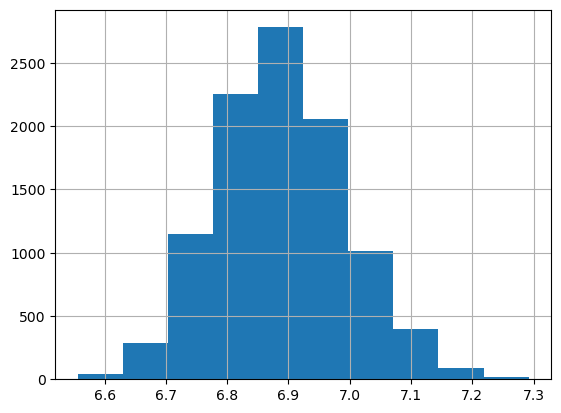

naming_rt_balota


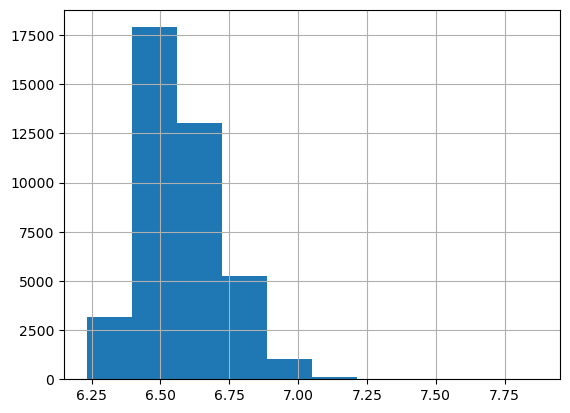

concreteness_rt_pexman


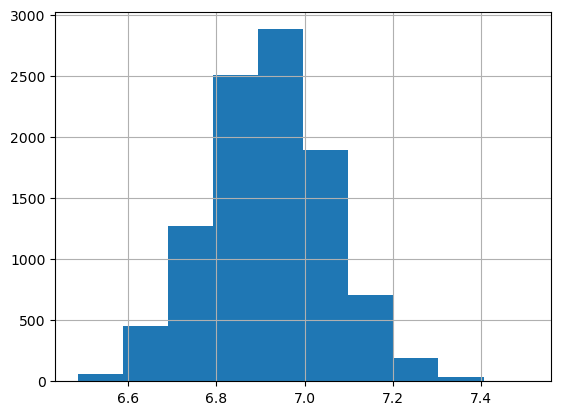

aoa_rt_khanna


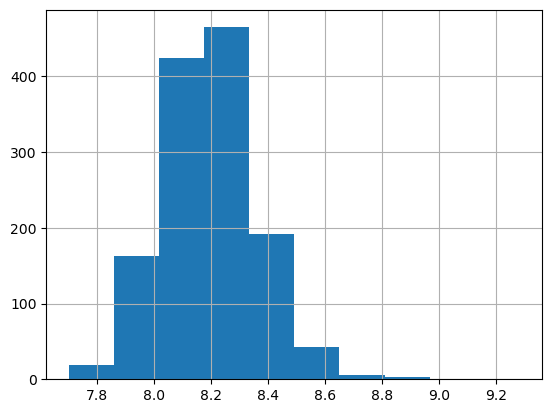

association_rt_ley


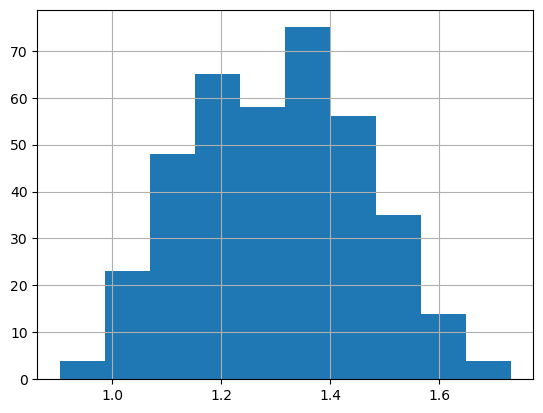

imageability_rt_chiarello


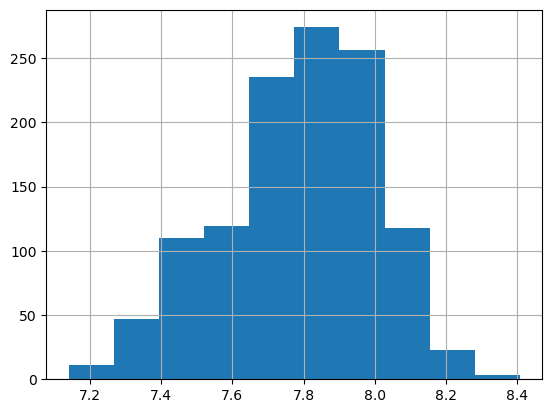

known_rt_chen


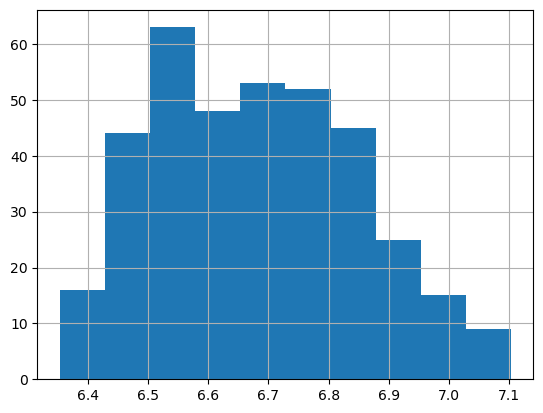

aoa_rt_cortese


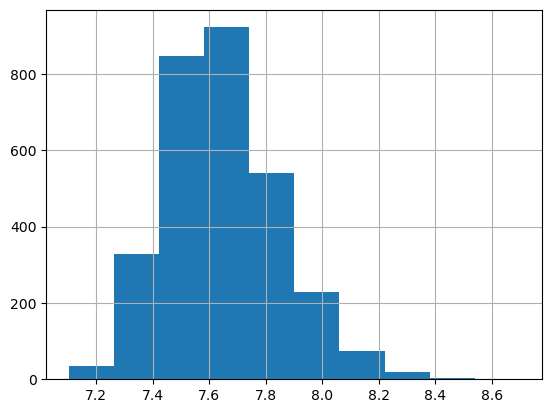

imageability_rt_cortese


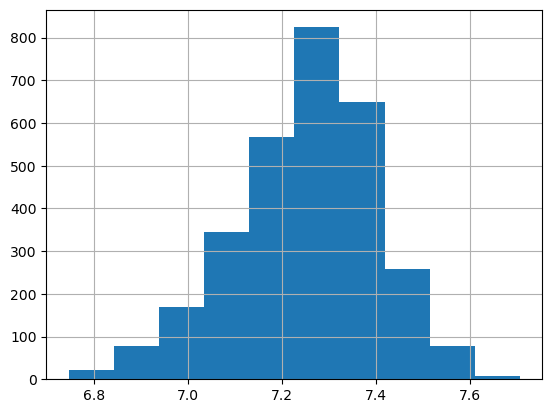

aoa_rt_schock


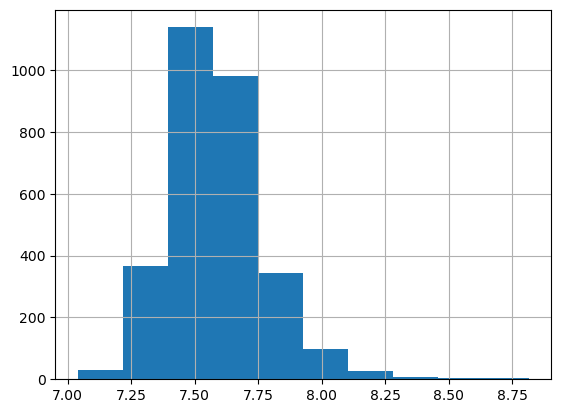

In [7]:
# Log transforming 
to_log = count_norms + rt_norms
norms[to_log] = norms[to_log].apply(np.log1p)

# Checking it roughly worked
for norm in to_log:
    print(norm)
    norms[norm].hist()
    plt.show()

In [8]:
# Log transforming selected norms
norms[to_log] = norms[to_log].apply(np.log1p)

# Saving
norms.to_csv('../../data/psychNorms/psychNorms_processed.zip', compression='zip')
meta.to_csv('../../data/psychNorms/psychNorms_metadata_processed.csv')